# Sentiment Analysis

Now, we have our cleaned dataset. We can start do our sentiment analysis on the comments about ```VOO``` from Subreddit ```r/ETFs```.

## Import Libraries

In [60]:
import pandas as pd

import torch

## Import the datasets

In [61]:
df = pd.read_csv('../datasets/cleaned_cmts_voo.csv')
df.head()

,author,id,date,permalink,body,score,subreddit
0,investing_me,kwsc2e7,2024-03-27,/r/ETFs/comments/1boyqg6/375qqq125tqqq375voo12...,Just buy VOO at this point,6,ETFs
1,iamfredrick,kwv4b7y,2024-03-27,/r/ETFs/comments/1bpdnmd/schg_schd_vs_voo/kwv4...,Voo & schg have 53% overlap. Past results don’...,3,ETFs
2,Fun_Grapefruit_3416,kwvj6cq,2024-03-27,/r/ETFs/comments/1bpdnmd/schg_schd_vs_voo/kwvj...,Schd + Schg makes up the majority of voo. Just...,2,ETFs
3,rem14,kwvnzn8,2024-03-27,/r/ETFs/comments/1bpdnmd/schg_schd_vs_voo/kwvn...,13% overlap with VOO and less than 1% overlap ...,2,ETFs
4,DITPiranha,kx0qfv5,2024-03-28,/r/ETFs/comments/1bq2hk5/voo_vgt_vti/kx0qfv5/,"30% VOO, 30% QQQ, 10% VYM, 10% BND, 10% Mixed ...",1,ETFs


## Using Transformer Model in Sentiment Analysis

### Example
An example to show the model works.

### Classify Sentiment

In [62]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

model_name = "yiyanghkust/finbert-tone"
sentiment_pipeline = pipeline("sentiment-analysis", model=model_name)

In [63]:
# Function to classify sentiment of a single text
def classify_sentiment(text):
    result = sentiment_pipeline(text)[0]
    # Update the sentiment label mapping based on the actual output of your model
    sentiment_labels = {'Positive': 2, 'Neutral': 1, 'Negative': 0}
    label = sentiment_labels.get(result['label'], -1)  # Default to -1 if label not found
    score = result['score']
    return label, score

# Apply the sentiment analysis to each comment
sentiment_results = df['body'].apply(lambda x: classify_sentiment(x[:512]))  # Limiting character count to 512

# Create new columns for sentiment label and score
df['sentiment_label'], df['sentiment_score'] = zip(*sentiment_results)

# Check the DataFrame
df.head()

,author,id,date,permalink,body,score,subreddit,sentiment_label,sentiment_score
0,investing_me,kwsc2e7,2024-03-27,/r/ETFs/comments/1boyqg6/375qqq125tqqq375voo12...,Just buy VOO at this point,6,ETFs,1,0.996938
1,iamfredrick,kwv4b7y,2024-03-27,/r/ETFs/comments/1bpdnmd/schg_schd_vs_voo/kwv4...,Voo & schg have 53% overlap. Past results don’...,3,ETFs,2,0.976062
2,Fun_Grapefruit_3416,kwvj6cq,2024-03-27,/r/ETFs/comments/1bpdnmd/schg_schd_vs_voo/kwvj...,Schd + Schg makes up the majority of voo. Just...,2,ETFs,1,0.999913
3,rem14,kwvnzn8,2024-03-27,/r/ETFs/comments/1bpdnmd/schg_schd_vs_voo/kwvn...,13% overlap with VOO and less than 1% overlap ...,2,ETFs,1,0.999995
4,DITPiranha,kx0qfv5,2024-03-28,/r/ETFs/comments/1bq2hk5/voo_vgt_vti/kx0qfv5/,"30% VOO, 30% QQQ, 10% VYM, 10% BND, 10% Mixed ...",1,ETFs,1,1.000000


In [64]:
sentiment_df = df[['date', 'body', 'sentiment_label', 'sentiment_score']]

sentiment_df.head()

,date,body,sentiment_label,sentiment_score
0,2024-03-27,Just buy VOO at this point,1,0.996938
1,2024-03-27,Voo & schg have 53% overlap. Past results don’...,2,0.976062
2,2024-03-27,Schd + Schg makes up the majority of voo. Just...,1,0.999913
3,2024-03-27,13% overlap with VOO and less than 1% overlap ...,1,0.999995
4,2024-03-28,"30% VOO, 30% QQQ, 10% VYM, 10% BND, 10% Mixed ...",1,1.000000


In [65]:
sentiment_df.isnull().sum()

date               0
body               0
sentiment_label    0
sentiment_score    0
dtype: int64

## Visualizing the Data

### 1. Time Series of Sentiment Counts
- **What it shows**: A bar chart displaying the comparison of the count of positive and negative comments over time.
- **Interpretation**: 
  - The height of the bars represents the count of sentiments (positive or negative) on each date.
  - A higher bar for positive sentiments on a specific date indicates more positive comments, and vice versa for negative sentiments.
  - The comparison between the heights of positive and negative bars on each date gives a visual representation of the predominant sentiment on that day.
- **Insights**: 
  - This visualization allows for the identification of dates with a significant imbalance between positive and negative sentiments, which can be indicative of specific events or changes in public perception.
  - Patterns or trends, such as periods with consistently more positive or negative sentiments, can be easily spotted and correlated with external events or news.
  - Sudden changes in the balance between positive and negative sentiment bars can signal shifts in public mood or reaction to specific occurrences.

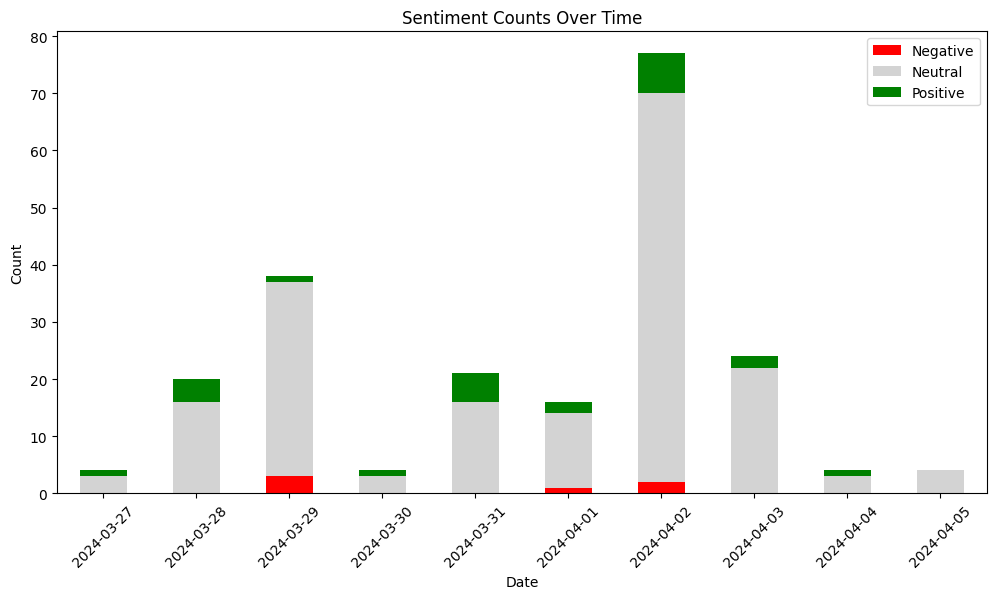

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by date and sentiment_label, then count occurrences
grouped = df.groupby(['date', 'sentiment_label']).size().unstack(fill_value=0)

# Plotting
grouped.plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'lightgray', 'green'])
plt.title('Sentiment Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(['Negative', 'Neutral', 'Positive'])
plt.xticks(rotation=45)
plt.show()

### 2. Heatmap for Sentiment Analysis
#### Heatmap for Sentiment Count
- **What it shows**: Displays the number of positive and negative comments for each date.
- **Interpretation**: 
  - Each cell represents the count of either positive or negative comments on a specific date.
  - The color intensity reflects the volume of comments - darker colors indicate a higher number of comments.
- **Insights**: 
  - Enables identification of dates with unusually high or low activity in terms of comment volume.
  - Can be correlated with specific events or news to understand what drives increased discussion and sentiment expression.

#### Heatmap for Average Sentiment Intensity
- **What it shows**: Represents the average sentiment score for positive and negative comments on each date.
- **Interpretation**: 
  - Each cell shows the average sentiment score for a particular sentiment (positive or negative) on a given date.
  - Color intensity reflects sentiment strength - darker colors indicate stronger sentiments (either more strongly positive or negative).
- **Insights**: 
  - Provides a clear view of how intense the sentiments are on specific dates.
  - Helps to distinguish between days with strong sentiments versus days with more moderate or mixed feelings.
  - Can reveal if there are specific dates where sentiments (positive or negative) are particularly strong, potentially correlating with major events affecting the stock trend.

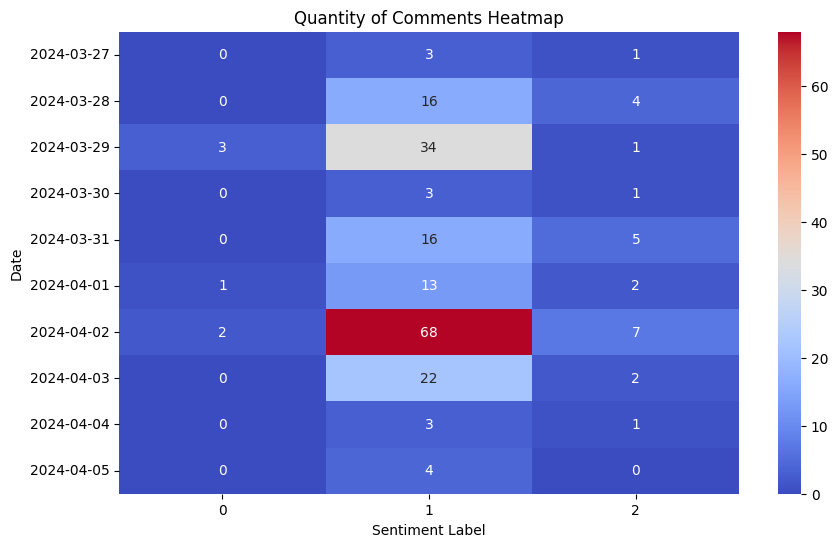

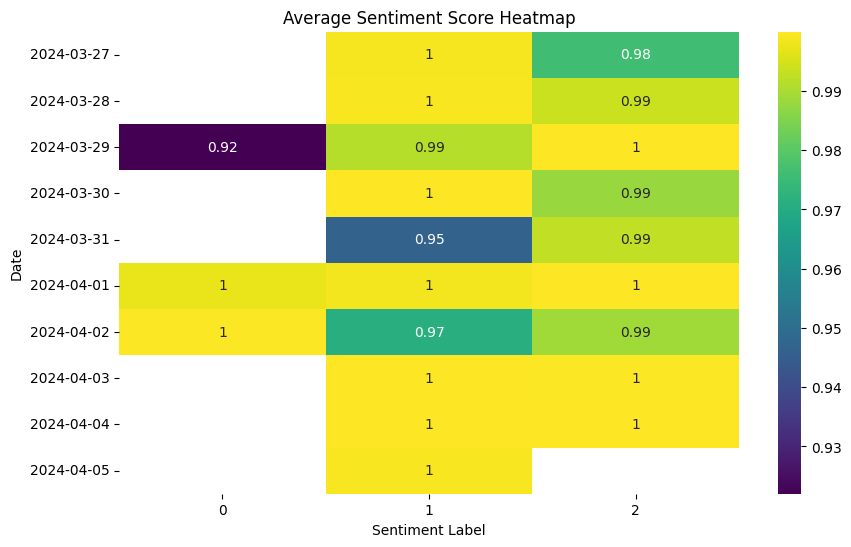

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace this with your sentiment_df)
data = {
    'date': sentiment_df['date'],
    'sentiment_label': sentiment_df['sentiment_label'],
    'sentiment_score': sentiment_df['sentiment_score']
}

visualization_df = pd.DataFrame(data)

# Heatmap 1: Quantity of Comments
# Counting comments
count_df = visualization_df.groupby(['date', 'sentiment_label']).size().unstack(fill_value=0)

# Plotting heatmap for quantity
plt.figure(figsize=(10, 6))
sns.heatmap(count_df, annot=True, cmap='coolwarm')
plt.title('Quantity of Comments Heatmap')
plt.xlabel('Sentiment Label')
plt.ylabel('Date')
plt.show()

# Heatmap 2: Average Sentiment Intensity
# Calculating average sentiment score
# Group by 'date' and 'sentiment_label' and compute average sentiment score
grouped = visualization_df.groupby(['date', 'sentiment_label']).mean().reset_index()

# Pivot the table
pivot_df = grouped.pivot(index='date', columns='sentiment_label', values='sentiment_score')

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, cmap='viridis')
plt.title('Average Sentiment Score Heatmap')
plt.xlabel('Sentiment Label')
plt.ylabel('Date')
plt.show()


### 3. Stacked Bar Chart with Sentiment Scores
- **What it shows**: Displays the number of comments broken down by sentiment score ranges, showing the strength of sentiments.
- **Interpretation**: Larger segments of stronger sentiments indicate more intense public feelings.
- **Insights**: Identifies the intensity of positive and negative sentiments on specific dates.

C:\Users\User\AppData\Local\Temp\ipykernel_22860\495504790.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_positive = positive_df.groupby(['date', 'score_bin']).size().unstack(fill_value=0)


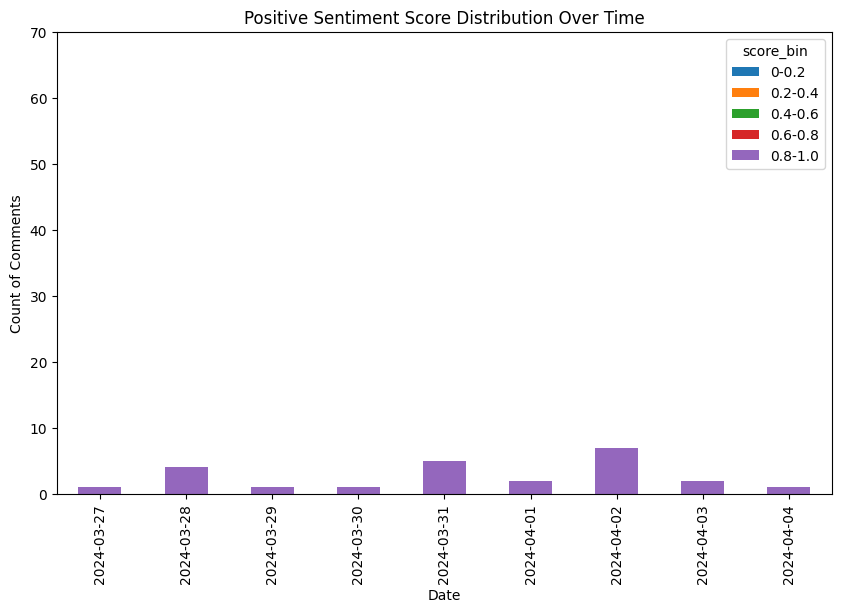

C:\Users\User\AppData\Local\Temp\ipykernel_22860\495504790.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_neutral = neutral_df.groupby(['date', 'score_bin']).size().unstack(fill_value=0)


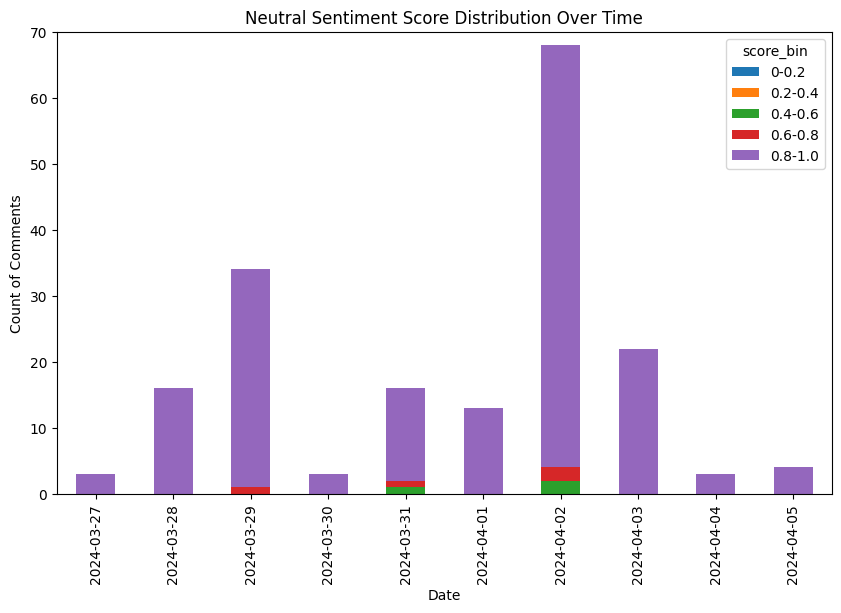

C:\Users\User\AppData\Local\Temp\ipykernel_22860\495504790.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_negative = negative_df.groupby(['date', 'score_bin']).size().unstack(fill_value=0)


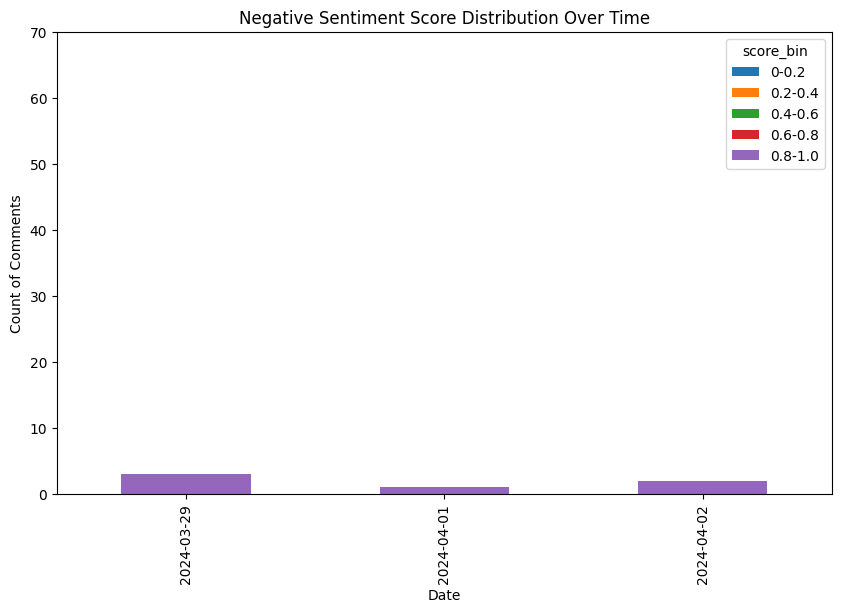

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (replace with your data)
data = {
    'date': sentiment_df['date'],
    'sentiment_score': sentiment_df['sentiment_score'],
    'sentiment_label': sentiment_df['sentiment_label']
}
visualization_df = pd.DataFrame(data)

# Bin the sentiment scores
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']
visualization_df['score_bin'] = pd.cut(visualization_df['sentiment_score'], bins=bins, labels=labels)

# Separate Positive and Negative DataFrames
positive_df = visualization_df[visualization_df['sentiment_label'] == 2]
neutral_df = visualization_df[visualization_df['sentiment_label'] == 1]
negative_df = visualization_df[visualization_df['sentiment_label'] == 0]

# Plotting Stacked Bar Chart for Positive Sentiments
pivot_positive = positive_df.groupby(['date', 'score_bin']).size().unstack(fill_value=0)
pivot_positive.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Positive Sentiment Score Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Comments')
plt.ylim(0, 70)
plt.show()

# Plotting Stacked Bar Chart for Neutral Sentiments
pivot_neutral = neutral_df.groupby(['date', 'score_bin']).size().unstack(fill_value=0)
pivot_neutral.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Neutral Sentiment Score Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Comments')
plt.ylim(0, 70)
plt.show()

# Plotting Stacked Bar Chart for Negative Sentiments
pivot_negative = negative_df.groupby(['date', 'score_bin']).size().unstack(fill_value=0)
pivot_negative.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Negative Sentiment Score Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Comments')
plt.ylim(0, 70)
plt.show()


### 4. Cumulative Sentiment Score Over Time
- **What it shows**: A line graph displaying the cumulative sentiment score, accumulating sentiment intensities over time.
- **Interpretation**: A rising line indicates accumulating positive sentiment, and a falling line indicates increasing negative sentiment.
- **Insights**: 
    - Useful for understanding the overall trend in sentiment, whether it's becoming more positive or negative over time.
    - If the graph shows a big increase followed by a big decrease on a specific date, it suggests a significant shift in public sentiment, likely due to a specific event or news.

C:\Users\User\AppData\Local\Temp\ipykernel_22860\2728887958.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
C:\Users\User\AppData\Local\Temp\ipykernel_22860\2728887958.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['sentiment_score'] = pd.to_numeric(sentiment_df['sentiment_score'], errors='coerce')


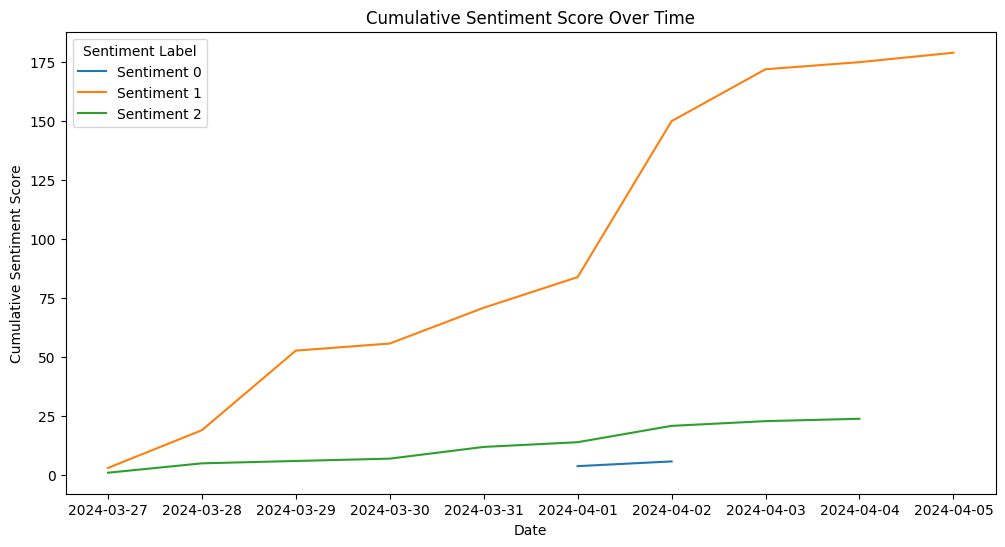

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming sentiment_df is your DataFrame
# Convert 'date' to datetime if it's not already
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Ensure 'sentiment_score' is numeric
sentiment_df['sentiment_score'] = pd.to_numeric(sentiment_df['sentiment_score'], errors='coerce')

# Group by 'date' and 'sentiment_label', then calculate the cumulative sum
grouped = sentiment_df.groupby(['date', 'sentiment_label'])['sentiment_score'].sum().groupby(level=1).cumsum().reset_index()

# Pivot the table
pivot_df = grouped.pivot(index='date', columns='sentiment_label', values='sentiment_score')

# Plot
plt.figure(figsize=(12, 6))
for label in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[label], label=f'Sentiment {label}')

plt.xlabel('Date')
plt.ylabel('Cumulative Sentiment Score')
plt.title('Cumulative Sentiment Score Over Time')
plt.legend(title='Sentiment Label')
plt.show()


### 5. Scatter Plot
- **What it shows**: Each comment is plotted as a point, with its date and sentiment score.
- **Interpretation**: Clustering of points indicates many strong sentiments on specific dates.
- **Insights**: Pinpoints specific days with unusually strong sentiments, and the nature of these sentiments.

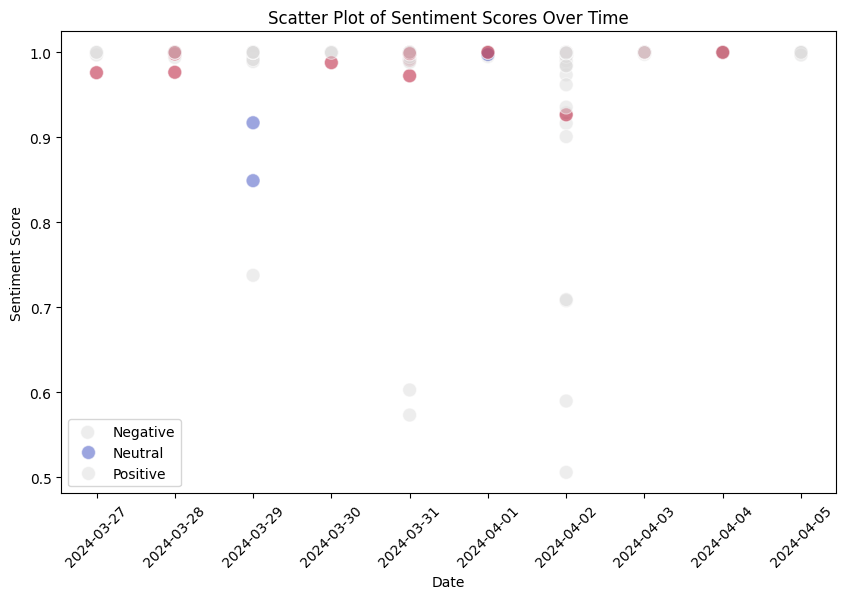

In [70]:
# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='date', y='sentiment_score', hue='sentiment_label', data=df, palette='coolwarm', s=100, alpha=0.5)
plt.title('Scatter Plot of Sentiment Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend(['Negative', 'Neutral', 'Positive'])
plt.xticks(rotation=45)
plt.show()


### 6. Box Plot and Violin Plot for Distribution of Sentiment Scores
- **What it shows**: These plots show the distribution and variability of sentiment scores for positive and negative comments.
- **Interpretation**: The spread and central tendency indicate how sentiment scores vary.
- **Insights**: Understands the consistency of sentiments and whether certain types (positive or negative) tend to have stronger feelings.

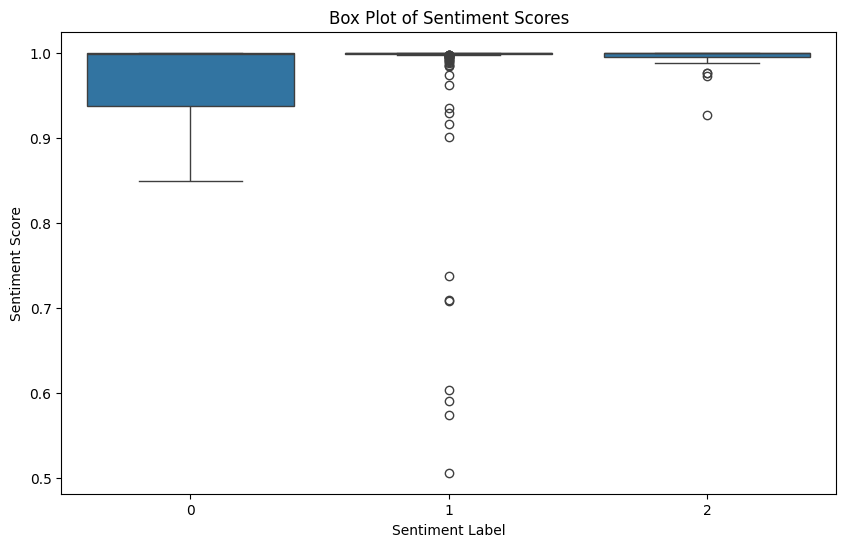

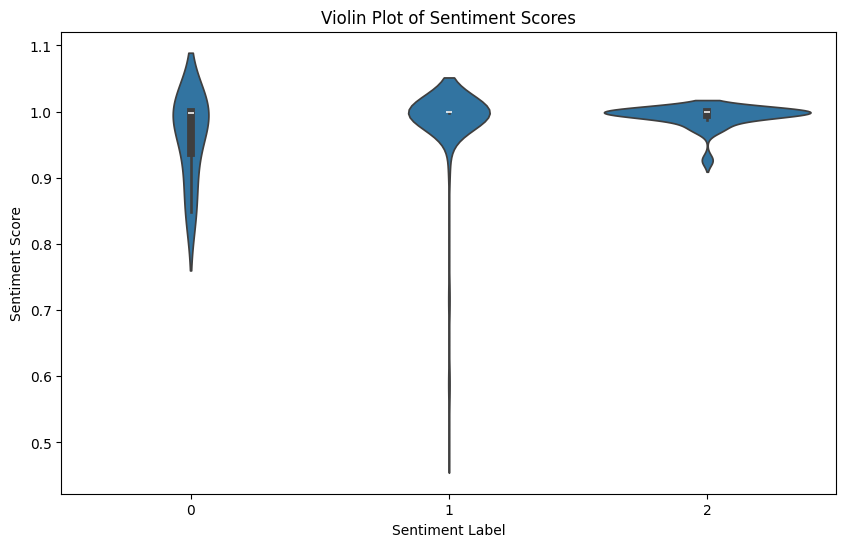

In [71]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment_label', y='sentiment_score', data=sentiment_df)
plt.xlabel('Sentiment Label')
plt.ylabel('Sentiment Score')
plt.title('Box Plot of Sentiment Scores')
plt.show()

# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='sentiment_label', y='sentiment_score', data=sentiment_df)
plt.xlabel('Sentiment Label')
plt.ylabel('Sentiment Score')
plt.title('Violin Plot of Sentiment Scores')
plt.show()


## Analyzing the Overall Sentiment

### 1. Net Sentiment Score (NSS)

In [72]:
import pandas as pd

data = {
    'date': sentiment_df['date'],
    'sentiment_label': sentiment_df['sentiment_label'],
    'sentiment_score': sentiment_df['sentiment_score']
}
nss_df = pd.DataFrame(data)

# Calculate Net Sentiment Score
nss = nss_df.groupby('date').apply(
    lambda x: (x[x['sentiment_label'] == 1]['sentiment_score'].sum() 
               - x[x['sentiment_label'] == 0]['sentiment_score'].sum()))

# Convert to DataFrame and reset index
nss_df = nss.reset_index()
nss_df.columns = ['date', 'nss']  # Renaming columns

nss_df


C:\Users\User\AppData\Local\Temp\ipykernel_22860\1599906162.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nss = nss_df.groupby('date').apply(


,date,nss
0,2024-03-27,2.996845
1,2024-03-28,15.988230
2,2024-03-29,30.936453
3,2024-03-30,2.999322
4,2024-03-31,15.146014
5,2024-04-01,11.984759
6,2024-04-02,64.045469
7,2024-04-03,21.993671
8,2024-04-04,2.999616
9,2024-04-05,3.996764


### Normalizing Net Sentiment Scores to a Range of -1 to 0

In [73]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler(feature_range=(0, 1))
nss_df['normalized_nss'] = scaler.fit_transform(nss_df['nss'].values.reshape(-1, 1))

nss_df


,date,nss,normalized_nss
0,2024-03-27,2.996845,0.000000
1,2024-03-28,15.988230,0.212804
2,2024-03-29,30.936453,0.457662
3,2024-03-30,2.999322,0.000041
4,2024-03-31,15.146014,0.199008
5,2024-04-01,11.984759,0.147225
6,2024-04-02,64.045469,1.000000
7,2024-04-03,21.993671,0.311175
8,2024-04-04,2.999616,0.000045
9,2024-04-05,3.996764,0.016379


In [74]:
voo_df = pd.read_csv('../datasets/VOO_sentiment.csv')
voo_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-03-26,479.059998,479.369995,476.429993,476.600006,476.600006,8073500
1,2024-03-27,479.510010,480.869995,477.450012,480.760010,480.760010,4951400
2,2024-03-28,480.869995,482.160004,480.500000,480.700012,480.700012,4065000
3,2024-04-01,481.440002,481.959991,478.829987,480.070007,480.070007,5734000
4,2024-04-02,476.329987,476.989990,474.709991,476.929993,476.929993,4817800


In [75]:
voo_df['actual_label'] = (voo_df['Close'] > voo_df['Open']).astype(int)

voo_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,actual_label
0,2024-03-26,479.059998,479.369995,476.429993,476.600006,476.600006,8073500,0
1,2024-03-27,479.510010,480.869995,477.450012,480.760010,480.760010,4951400,1
2,2024-03-28,480.869995,482.160004,480.500000,480.700012,480.700012,4065000,0
3,2024-04-01,481.440002,481.959991,478.829987,480.070007,480.070007,5734000,0
4,2024-04-02,476.329987,476.989990,474.709991,476.929993,476.929993,4817800,1


In [76]:
nss_df['date'] = pd.to_datetime(nss_df['date'])
voo_df['Date'] = pd.to_datetime(voo_df['Date'])

voo_df['actual_label'] = voo_df['actual_label']

nss_df = pd.merge(nss_df, voo_df, how='left', left_on='date', right_on='Date')

nss_df.drop(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1, inplace=True)

nss_df

,date,nss,normalized_nss,actual_label
0,2024-03-27,2.996845,0.000000,1.0
1,2024-03-28,15.988230,0.212804,0.0
2,2024-03-29,30.936453,0.457662,NaN
3,2024-03-30,2.999322,0.000041,NaN
4,2024-03-31,15.146014,0.199008,NaN
5,2024-04-01,11.984759,0.147225,0.0
6,2024-04-02,64.045469,1.000000,1.0
7,2024-04-03,21.993671,0.311175,1.0
8,2024-04-04,2.999616,0.000045,0.0
9,2024-04-05,3.996764,0.016379,1.0


1 means that stock price go higher, 0 means that stock price go lower, NaN means non-trading days.

### Correlation Analysis and Statistical Measures

In [77]:
# Calculate correlation for NSS
correlation_nss = nss_df['normalized_nss'].corr(nss_df['actual_label'], method='pearson')
print("Pearson Correlation Coefficient (NSS):", correlation_nss)

Pearson Correlation Coefficient (NSS): 0.318783603678739


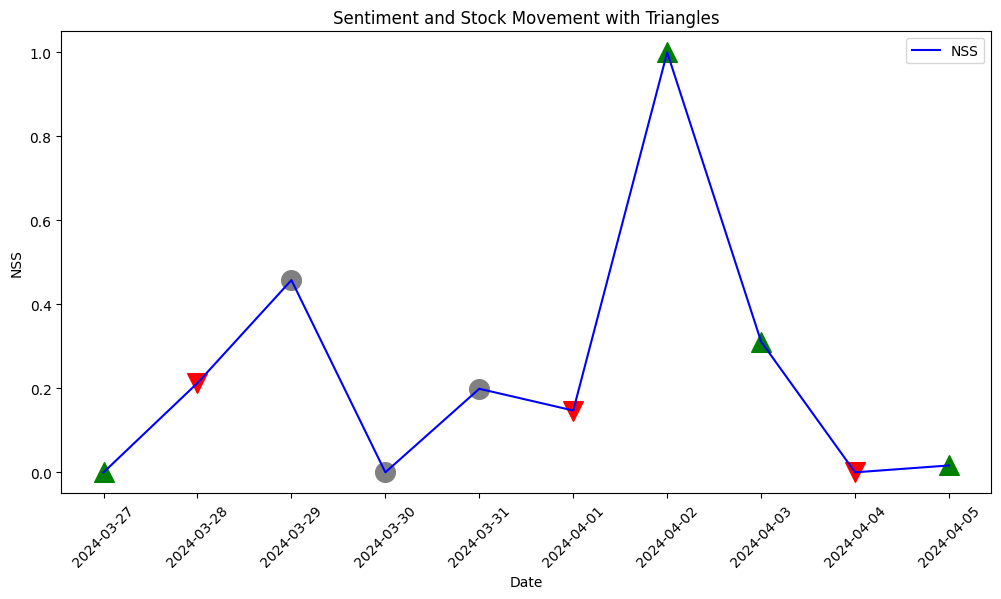

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(nss_df['date'], nss_df['normalized_nss'], label='NSS', color='blue')

for i, row in nss_df.iterrows():
    if row['actual_label'] == 1:
        plt.scatter(row['date'], row['normalized_nss'], color='green', marker='^', s=200)
    elif row['actual_label'] == 0:
        plt.scatter(row['date'], row['normalized_nss'], color='red', marker='v', s=200)
    else:
        plt.scatter(row['date'], row['normalized_nss'], color='grey', marker='o', s=200)

plt.xlabel('Date')
plt.ylabel('NSS')
plt.title('Sentiment and Stock Movement with Triangles')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [79]:
import plotly.graph_objects as go

# Creating the line plot for weighted average sentiment
fig = go.Figure()
fig.add_trace(go.Scatter(x=nss_df['date'], y=nss_df['normalized_nss'], mode='lines', name='NSS Sentiment', line=dict(color='blue')))

# Adding markers for actual stock labels
for i, row in nss_df.iterrows():
    if row['actual_label'] == 1:
        fig.add_trace(go.Scatter(x=[row['date']], y=[row['normalized_nss']], mode='markers', marker_symbol='triangle-up', marker_color='green', marker_size=10, name='Stock Up'))
    elif row['actual_label'] == 0:
        fig.add_trace(go.Scatter(x=[row['date']], y=[row['normalized_nss']], mode='markers', marker_symbol='triangle-down', marker_color='red', marker_size=10, name='Stock Down'))
    else:
        fig.add_trace(go.Scatter(x=[row['date']], y=[row['normalized_nss']], mode='markers', marker_symbol='circle', marker_color='grey', marker_size=10, name='Market Closed'))

# Setting layout for the figure
fig.update_layout(title='Sentiment and Stock Movement with Interactive Triangles', xaxis_title='Date', yaxis_title='NSS Sentiment', legend_title='Legend')
fig.show()

### Correlation between Stock Daily Return and NSS Sentiment

In [80]:
voo_df = pd.read_csv('../datasets/VOO_sentiment.csv')
voo_df['daily_return'] = (voo_df['Close'] - voo_df['Open']) / voo_df['Open']

voo_df

,Date,Open,High,Low,Close,Adj Close,Volume,daily_return
0,2024-03-26,479.059998,479.369995,476.429993,476.600006,476.600006,8073500,-0.005135
1,2024-03-27,479.510010,480.869995,477.450012,480.760010,480.760010,4951400,0.002607
2,2024-03-28,480.869995,482.160004,480.500000,480.700012,480.700012,4065000,-0.000353
3,2024-04-01,481.440002,481.959991,478.829987,480.070007,480.070007,5734000,-0.002846
4,2024-04-02,476.329987,476.989990,474.709991,476.929993,476.929993,4817800,0.001260
5,2024-04-03,475.839996,478.799988,475.790009,477.359985,477.359985,6218200,0.003194
6,2024-04-04,481.200012,481.480011,471.269989,471.480011,471.480011,6871200,-0.020200
7,2024-04-05,472.850006,478.329987,472.420013,476.489990,476.489990,5582200,0.007698


In [81]:
voo_df['Date'] = pd.to_datetime(voo_df['Date'])
nss_df['date'] = pd.to_datetime(nss_df['date'])

nss_df = pd.merge(nss_df, voo_df, how='left', left_on='date', right_on='Date')
nss_df.drop(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1, inplace=True)

nss_df

,date,nss,normalized_nss,actual_label,daily_return
0,2024-03-27,2.996845,0.000000,1.0,0.002607
1,2024-03-28,15.988230,0.212804,0.0,-0.000353
2,2024-03-29,30.936453,0.457662,NaN,NaN
3,2024-03-30,2.999322,0.000041,NaN,NaN
4,2024-03-31,15.146014,0.199008,NaN,NaN
5,2024-04-01,11.984759,0.147225,0.0,-0.002846
6,2024-04-02,64.045469,1.000000,1.0,0.001260
7,2024-04-03,21.993671,0.311175,1.0,0.003194
8,2024-04-04,2.999616,0.000045,0.0,-0.020200
9,2024-04-05,3.996764,0.016379,1.0,0.007698


#### Dual Y-Axis Time-Series Plot for Normalized NSS and Daily Stock Returns

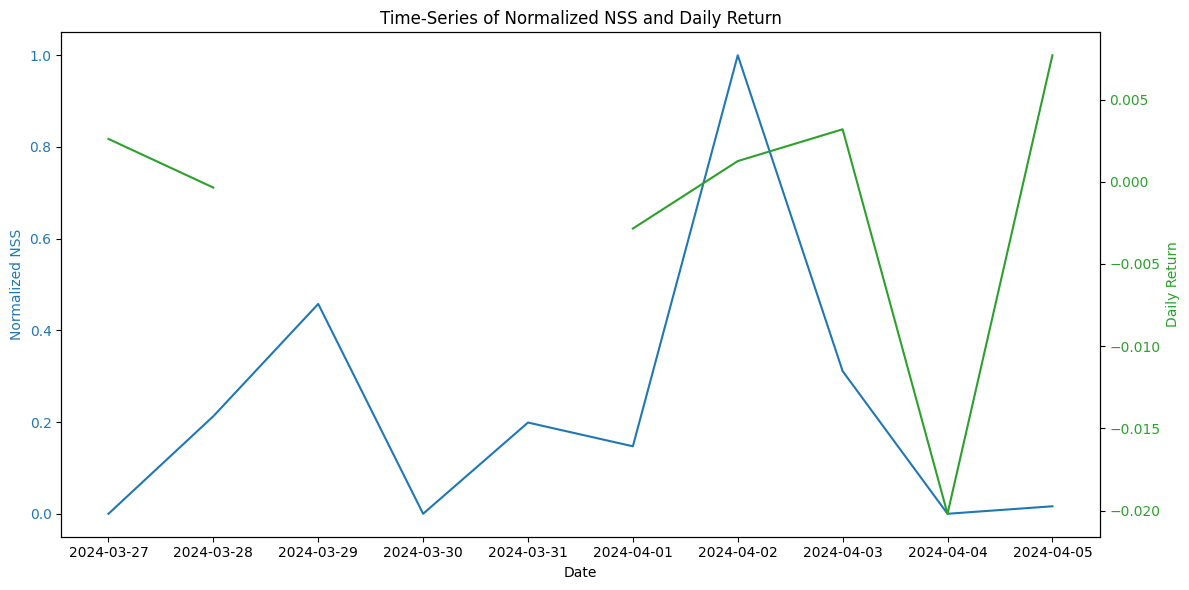

In [82]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# First axis (ax1) for NSS
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized NSS', color=color)
ax1.plot(nss_df['date'], nss_df['normalized_nss'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis (ax2) for Daily Return
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Daily Return', color=color)
ax2.plot(nss_df['date'], nss_df['daily_return'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and show plot
plt.title('Time-Series of Normalized NSS and Daily Return')
fig.tight_layout()  # otherwise the right y-label may be slightly clipped
plt.show()


### 2. Weighted Average Calculation

In [83]:
import pandas as pd

data = {
    'date': sentiment_df['date'],
    'sentiment_label': sentiment_df['sentiment_label'],
    'sentiment_score': sentiment_df['sentiment_score']
}
weighted_avg_df = pd.DataFrame(data)

# Calculate Weighted Average Sentiment
weighted_avg = weighted_avg_df.groupby('date').apply(
    lambda x: (x['sentiment_label'] * x['sentiment_score']).sum() / x['sentiment_score'].sum())

# Convert to DataFrame and reset index
weighted_avg_df = weighted_avg.reset_index()
weighted_avg_df.columns = ['date', 'weighted_average']  # Renaming columns

weighted_avg_df


C:\Users\User\AppData\Local\Temp\ipykernel_22860\580712688.py:11: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,date,weighted_average
0,2024-03-27,1.245679
1,2024-03-28,1.199104
2,2024-03-29,0.952866
3,2024-03-30,1.247756
4,2024-03-31,1.246772
5,2024-04-01,1.062737
6,2024-04-02,1.065669
7,2024-04-03,1.083322
8,2024-04-04,1.250019
9,2024-04-05,1.000000


In [84]:
voo_df = pd.read_csv('../datasets/VOO_sentiment.csv')
voo_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-03-26,479.059998,479.369995,476.429993,476.600006,476.600006,8073500
1,2024-03-27,479.510010,480.869995,477.450012,480.760010,480.760010,4951400
2,2024-03-28,480.869995,482.160004,480.500000,480.700012,480.700012,4065000
3,2024-04-01,481.440002,481.959991,478.829987,480.070007,480.070007,5734000
4,2024-04-02,476.329987,476.989990,474.709991,476.929993,476.929993,4817800
5,2024-04-03,475.839996,478.799988,475.790009,477.359985,477.359985,6218200
6,2024-04-04,481.200012,481.480011,471.269989,471.480011,471.480011,6871200
7,2024-04-05,472.850006,478.329987,472.420013,476.489990,476.489990,5582200


In [85]:
voo_df['actual_label'] = (voo_df['Close'] > voo_df['Open']).astype(int)

voo_df

,Date,Open,High,Low,Close,Adj Close,Volume,actual_label
0,2024-03-26,479.059998,479.369995,476.429993,476.600006,476.600006,8073500,0
1,2024-03-27,479.510010,480.869995,477.450012,480.760010,480.760010,4951400,1
2,2024-03-28,480.869995,482.160004,480.500000,480.700012,480.700012,4065000,0
3,2024-04-01,481.440002,481.959991,478.829987,480.070007,480.070007,5734000,0
4,2024-04-02,476.329987,476.989990,474.709991,476.929993,476.929993,4817800,1
5,2024-04-03,475.839996,478.799988,475.790009,477.359985,477.359985,6218200,1
6,2024-04-04,481.200012,481.480011,471.269989,471.480011,471.480011,6871200,0
7,2024-04-05,472.850006,478.329987,472.420013,476.489990,476.489990,5582200,1


In [86]:
weighted_avg_df['date'] = pd.to_datetime(weighted_avg_df['date'])
voo_df['Date'] = pd.to_datetime(voo_df['Date'])

weighted_avg_df = pd.merge(weighted_avg_df, voo_df, how='left', left_on='date', right_on='Date')

weighted_avg_df.drop(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1, inplace=True)

weighted_avg_df

,date,weighted_average,actual_label
0,2024-03-27,1.245679,1.0
1,2024-03-28,1.199104,0.0
2,2024-03-29,0.952866,NaN
3,2024-03-30,1.247756,NaN
4,2024-03-31,1.246772,NaN
5,2024-04-01,1.062737,0.0
6,2024-04-02,1.065669,1.0
7,2024-04-03,1.083322,1.0
8,2024-04-04,1.250019,0.0
9,2024-04-05,1.000000,1.0


1 means that stock price go higher, 0 means that stock price go lower, NaN means non-trading days.

### Correlation Analysis and Statistical Measures

In [87]:
import pandas as pd

correlation = weighted_avg_df['weighted_average'].corr(weighted_avg_df['actual_label'], method='pearson')
print("Pearson Correlation Coefficient:", correlation)

Pearson Correlation Coefficient: -0.38363834138989156


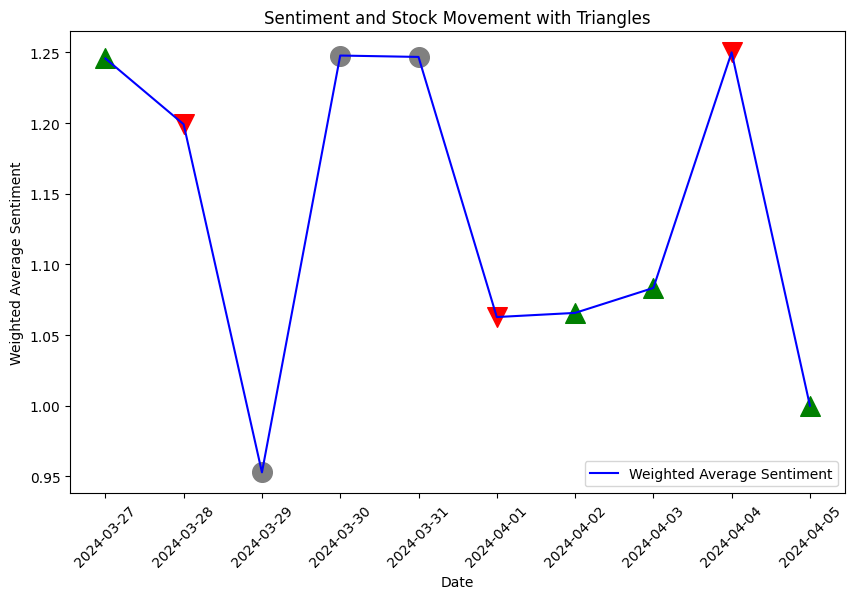

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(weighted_avg_df['date'], weighted_avg_df['weighted_average'], label='Weighted Average Sentiment', color='blue')

for i, row in weighted_avg_df.iterrows():
    if row['actual_label'] == 1:
        plt.scatter(row['date'], row['weighted_average'], color='green', marker='^', s=200)
    elif row['actual_label'] == 0:
        plt.scatter(row['date'], row['weighted_average'], color='red', marker='v', s=200)
    else:
        plt.scatter(row['date'], row['weighted_average'], color='grey', marker='o', s=200)

plt.xlabel('Date')
plt.ylabel('Weighted Average Sentiment')
plt.title('Sentiment and Stock Movement with Triangles')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [89]:
import plotly.graph_objects as go

# Creating the line plot for weighted average sentiment
fig = go.Figure()
fig.add_trace(go.Scatter(x=weighted_avg_df['date'], y=weighted_avg_df['weighted_average'], mode='lines', name='Weighted Average Sentiment', line=dict(color='blue')))

# Adding markers for actual stock labels
for i, row in weighted_avg_df.iterrows():
    if row['actual_label'] == 1:
        fig.add_trace(go.Scatter(x=[row['date']], y=[row['weighted_average']], mode='markers', marker_symbol='triangle-up', marker_color='green', marker_size=10, name='Stock Up'))
    elif row['actual_label'] == 0:
        fig.add_trace(go.Scatter(x=[row['date']], y=[row['weighted_average']], mode='markers', marker_symbol='triangle-down', marker_color='red', marker_size=10, name='Stock Down'))
    else:
        fig.add_trace(go.Scatter(x=[row['date']], y=[row['weighted_average']], mode='markers', marker_symbol='circle', marker_color='grey', marker_size=10, name='Market Closed'))

# Setting layout for the figure
fig.update_layout(title='Sentiment and Stock Movement with Interactive Triangles', xaxis_title='Date', yaxis_title='Weighted Average Sentiment', legend_title='Legend')
fig.show()


### Correlation between Stock Daily Returns and Weighted Average Sentiment

In [90]:
voo_df = pd.read_csv('../datasets/VOO_sentiment.csv')
voo_df['daily_return'] = (voo_df['Close'] - voo_df['Open']) / voo_df['Open']

voo_df

,Date,Open,High,Low,Close,Adj Close,Volume,daily_return
0,2024-03-26,479.059998,479.369995,476.429993,476.600006,476.600006,8073500,-0.005135
1,2024-03-27,479.510010,480.869995,477.450012,480.760010,480.760010,4951400,0.002607
2,2024-03-28,480.869995,482.160004,480.500000,480.700012,480.700012,4065000,-0.000353
3,2024-04-01,481.440002,481.959991,478.829987,480.070007,480.070007,5734000,-0.002846
4,2024-04-02,476.329987,476.989990,474.709991,476.929993,476.929993,4817800,0.001260
5,2024-04-03,475.839996,478.799988,475.790009,477.359985,477.359985,6218200,0.003194
6,2024-04-04,481.200012,481.480011,471.269989,471.480011,471.480011,6871200,-0.020200
7,2024-04-05,472.850006,478.329987,472.420013,476.489990,476.489990,5582200,0.007698


In [91]:
voo_df['Date'] = pd.to_datetime(voo_df['Date'])
weighted_avg_df['date'] = pd.to_datetime(weighted_avg_df['date'])

weighted_avg_df = pd.merge(weighted_avg_df, voo_df, how='left', left_on='date', right_on='Date')
weighted_avg_df.drop(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1, inplace=True)

weighted_avg_df

,date,weighted_average,actual_label,daily_return
0,2024-03-27,1.245679,1.0,0.002607
1,2024-03-28,1.199104,0.0,-0.000353
2,2024-03-29,0.952866,NaN,NaN
3,2024-03-30,1.247756,NaN,NaN
4,2024-03-31,1.246772,NaN,NaN
5,2024-04-01,1.062737,0.0,-0.002846
6,2024-04-02,1.065669,1.0,0.001260
7,2024-04-03,1.083322,1.0,0.003194
8,2024-04-04,1.250019,0.0,-0.020200
9,2024-04-05,1.000000,1.0,0.007698


#### Dual Y-Axis Time-Series Plot for Weighted Average and Daily Stock Returns

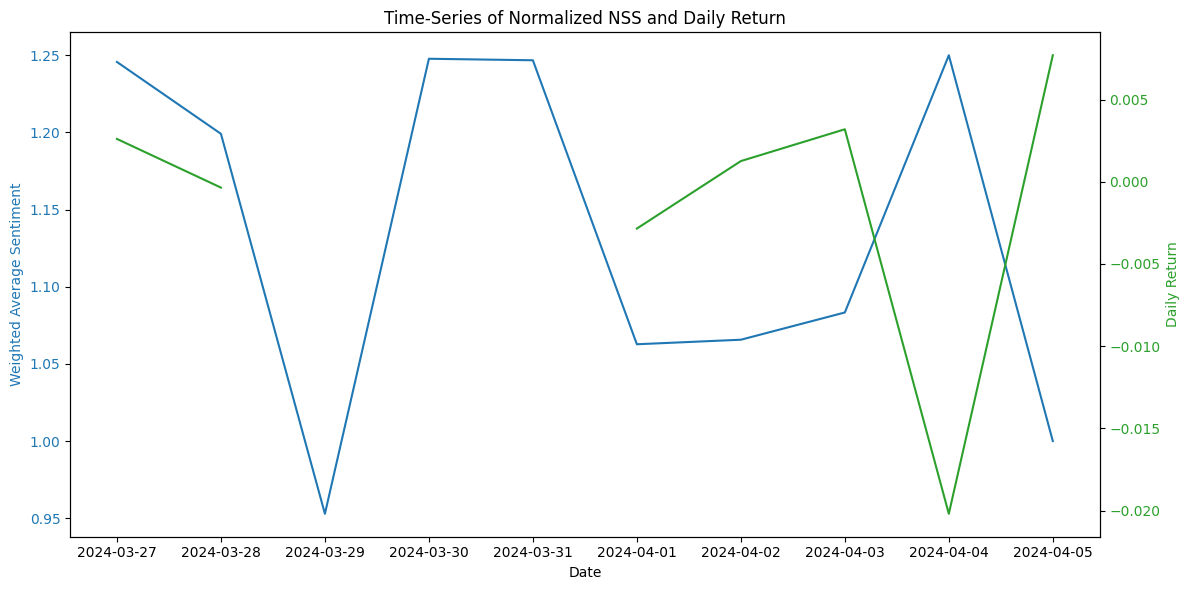

In [92]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# First axis (ax1) for NSS
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Weighted Average Sentiment', color=color)
ax1.plot(nss_df['date'], weighted_avg_df['weighted_average'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis (ax2) for Daily Return
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Daily Return', color=color)
ax2.plot(nss_df['date'], weighted_avg_df['daily_return'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and show plot
plt.title('Time-Series of Normalized NSS and Daily Return')
fig.tight_layout()  # otherwise the right y-label may be slightly clipped
plt.show()
